In [1]:
from copy import deepcopy
from pathlib import Path
from typing import Any

import numpy as np
import onnxruntime as nx
import torch
import torch.nn as nn
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
from src.traffic_sign_detector import TrafficSignDetector
from torchvision import transforms
from ultralytics import YOLO

In [2]:
inference_data = Path("../data/")

In [3]:
images = [Image.open(filename).convert("RGB") for filename in inference_data.iterdir()]

In [4]:
font = ImageFont.load_default(size=20)

In [5]:
def detect_objects_on_image(model: Any, image: Image) -> list:
    result = model(image)[0]
    output = []
    for box in result.boxes:
        x1, y1, x2, y2 = [round(x) for x in box.xyxy[0].tolist()]
        class_id = box.cls[0].item()
        prob = round(box.conf[0].item(), 2)
        output.append([x1, y1, x2, y2, result.names[class_id], prob])
    return output

In [6]:
def plot_detection_result(image: Image, bboxes) -> Image:
    draw = ImageDraw.Draw(image)
    for bbox in bboxes:
        draw.rectangle(bbox[:4], outline="red", width=3)
        draw.text(
            (bbox[0], bbox[1] - 20),
            f"{bbox[4]}, prob: {bbox[5]}",
            fill="red",
            font=font,
        )
    display(image)

Инференс с ultralytics

In [10]:
model = YOLO("best.pt")


0: 320x640 2 3_24s, 1 1_33, 19.5ms
Speed: 3.3ms preprocess, 19.5ms inference, 4.1ms postprocess per image at shape (1, 3, 320, 640)


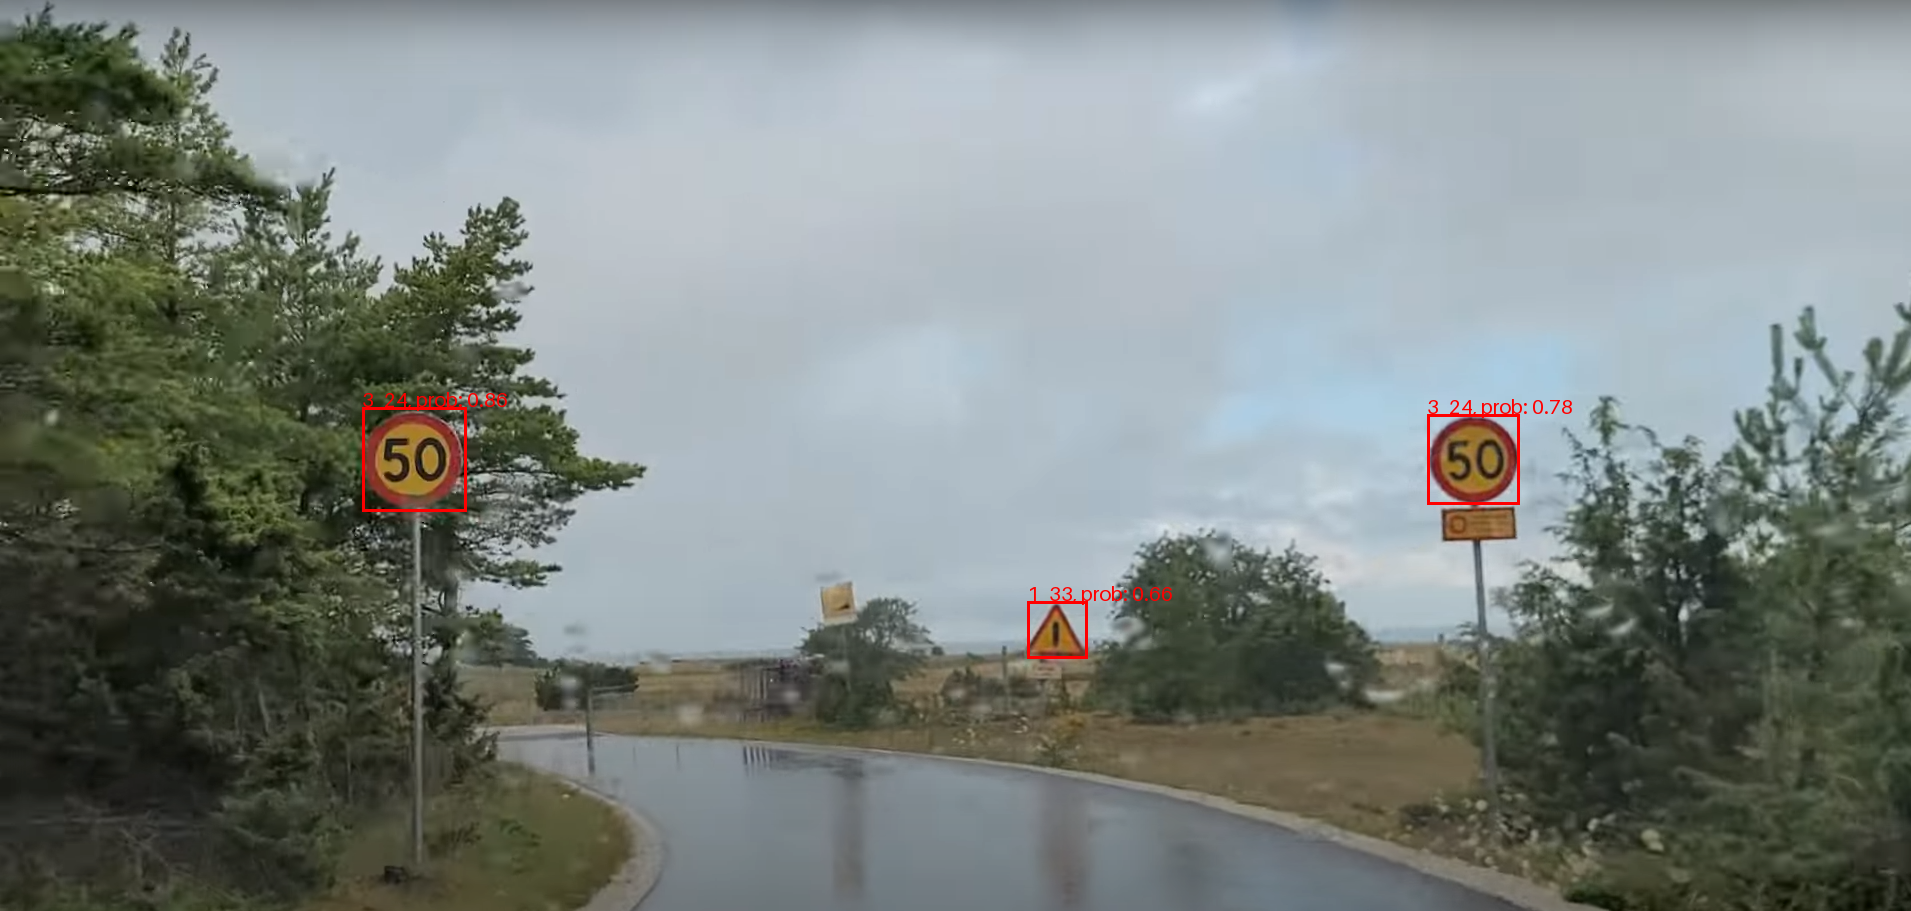


0: 320x640 3 5_19_1s, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 640)


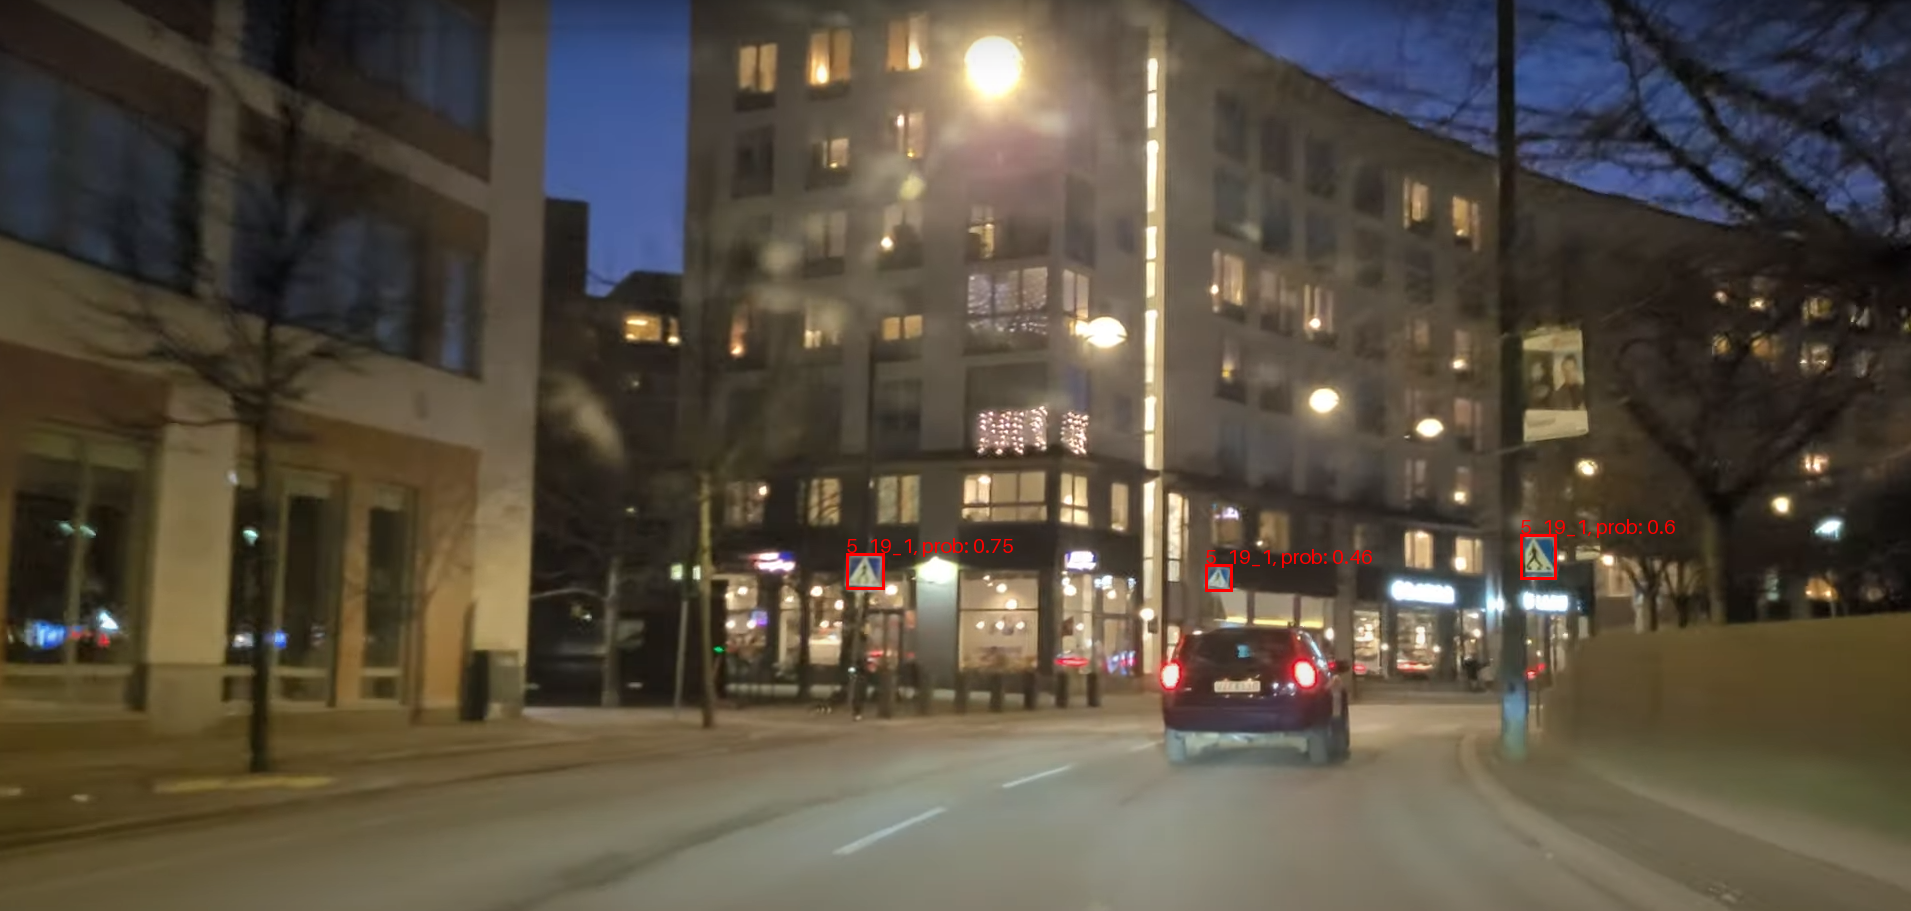


0: 320x640 1 1_25, 1 3_27, 1 4_2_2, 17.7ms
Speed: 3.0ms preprocess, 17.7ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 640)


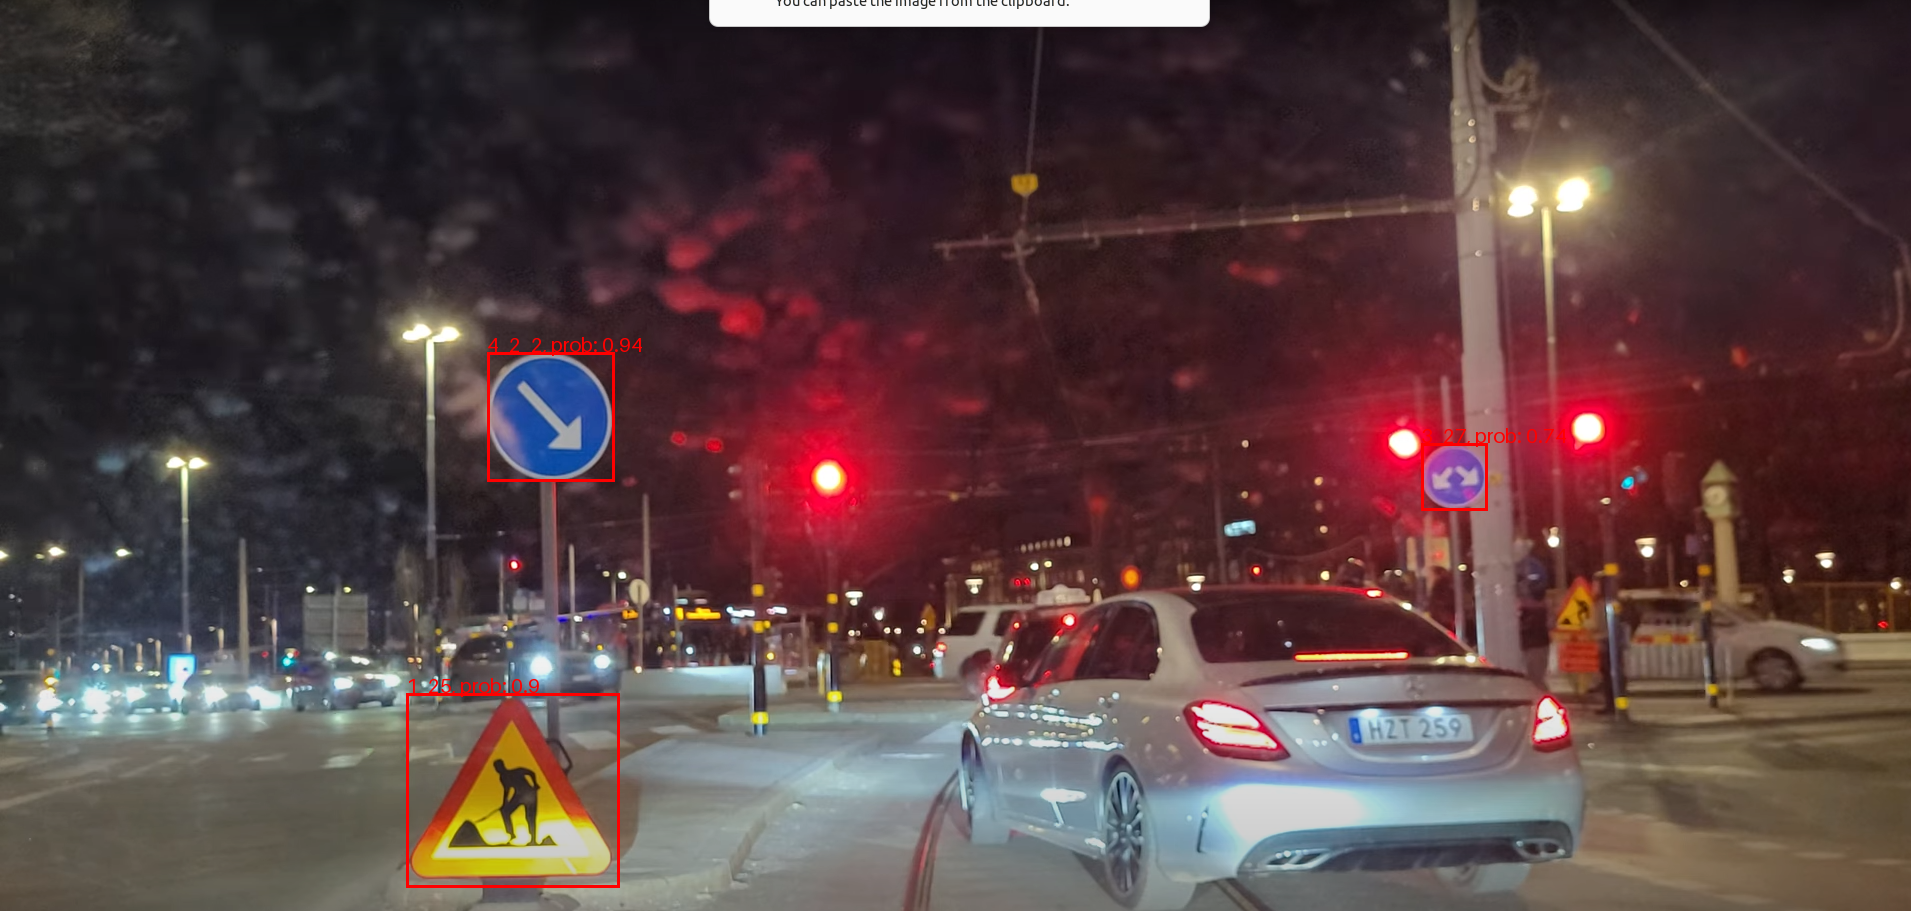

In [85]:
for image in images:
    outputs = detect_objects_on_image(model, image)
    plot_detection_result(deepcopy(image), outputs)

Инференс с ONNX runtime

In [7]:
detector = TrafficSignDetector("best.onnx")

In [9]:
print(detector(np.asarray(images[2])))

(array([[     357.23,      410.99,      468.85,      508.41],
       [     1424.2,      415.46,      1521.7,      505.91],
       [     1027.4,      603.43,      1085.2,      659.73],
       [     1426.2,      415.29,        1521,      506.09]], dtype=float32), array([    0.78581,     0.42618,     0.26174,     0.10433], dtype=float32), array([3, 3, 6, 6]))
